## Examples of Using `qe2DDEC.py`

In [1]:
from qe2DDEC import *

# if qe2DDEC is not in your current working dir, uncomment the following comment 
# and change the path to let you code know where to look for raw2qe.py

# import sys
# sys.path.insert(1, 'C://Path//to//the//folder')#!!!use single backslash for linux OS

# charge density calculations have been run and the results are stored in the following
# root folder
optroot = "C://Users//liu_s//Documents//BW_results//DDEC//date-06-15-2020"
# we use the following command to redistribute 248 files into separate folders 
# so that files with similar names(from the same calculation)
# will go to the same folder.
# The output files are named as 'cation-name'+'f/h'+a number+'gs'+suffix, 
# we can do the following to group them into the same folder.

# First we create a list for subfolders' names. Strings in the list must be substrings of
# files' names. 
folders = []
for cation in ['Li','Na','K','Rb','Cs']:
    for a in ['h','f']:
        for b in ['1','2','3','4']:
            folders.append(cation+a+b)
            
# assign files into different folders     
redistri_opt(optroot,folders)

Now you can see below that many folders created in the 'optroot' 
![](images/distributed-folders.PNG)

### Create `job_control.txt` in each subfolder

In [2]:
from qe2DDEC import *
optroot = "C://Users//liu_s//Documents//BW_results//DDEC//date-06-15-2020"
# Prepare 'job_control.txt' in each folder
folders = []
for cation in ['Li','Na','K','Rb','Cs']:
    for a in ['h','f']:
        for b in ['1','2','3','4']:
            folders.append(cation+a+b)
for i in folders:
    prep_DDECipt(os.path.join(optroot,i))

The 'job_control.txt' file is created in each folder. 
![](generate-job-control.PNG)

### Run the binary executable 

In [2]:
from qe2DDEC import *
import os
# Let us proceed to run precompiled binary executable to do DDEC6 analysis
# We need a source path to precompiled binary file
source = 'C://Users//liu_s//Downloads//chargemol_09_26_2017//chargemol_09_26_2017//chargemol_FORTRAN_09_26_2017//compiled_binaries//windows//Chargemol_09_26_2017_windows_64bits_serial_command_line.exe'
# The path to root output folder should be changed into normal WINDOWS format with single
# backslash
rootPath = r'C:\Users\liu_s\Documents\BW_results\DDEC\date-06-15-2020'
folders = []
for cation in [r'\Li',r'\Na',r'\K',r'\Rb',r'\Cs']:
    for a in ['h','f']:
        for b in ['1','2','3','4']:
            folders.append(rootPath+cation+a+b)
for f in folders:
    run_DDEC(f,source)

complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!


Now that the analysis is done for all the 40 cases, we see that some subfolders contain results shown below:

![](ddec-with-results.png)

But some folders do not

![](images/ddec-without-results.PNG)

This is likely because of **the electrons that can not be assigned to any nucleus in your system**. You can find it at the "checkme" value at the bottom of "total_cobe_DDEC_analysis.output" file (see below).

![](images/incorrect-net-charge.png)

In the case shown above, we have in total $0.13893$ electrons that can not be assigned to any nucleus. It might be caused by the coarse scheme of K-points or the inaccuracy of the pseudopotential you use. You can solve this problem by rerunning SCF calculations using **dense k-points scheme and/or different pseudopotential.**

Here, we find that cases with **Rb** atoms in them cannot produce DDEC results properly. We use the Pseudopotential for **Rb** with electron configuration of **[Kr]5s1** to redo the SCF and perform DDEC6 analysis again(see below):

In [6]:
from qe2DDEC import *
import os
source = 'C://Users//liu_s//Downloads//chargemol_09_26_2017//chargemol_09_26_2017//chargemol_FORTRAN_09_26_2017//compiled_binaries//windows//Chargemol_09_26_2017_windows_64bits_serial_command_line.exe'
# The path to root output folder should be changed into normal WINDOWS format with single 
# backslash
rootPath = r'C:\Users\liu_s\Documents\BW_results\DDEC\date-06-15-2020'
folders = []
for cation in [r'\Rbf2',r'\Rbf3',r'\Rbf4']:
            folders.append(rootPath+cation)
for f in folders:
    run_DDEC(f,source)

complete!
complete!
complete!


Sometimes, using different pseudopotentials could cause incorrect calculation of the number of core electrons. The **'checkme' in `total_cube_DDEC_analysis.output` is a integer** in this case. To correct `net charge` parameter, We can simply add the value of 'checkme' back to the `net charge` parameter using the function of `checkme`(see below).

In [5]:
# We use 'checkme' function to change job_cotrol files for the failed cases
from qe2DDEC import *
import os
rootPath = 'C://Users//liu_s//Documents//BW_results//DDEC//date-06-15-2020//'
for c in ['Rbf1','Rbf2','Rbf3','Rbf4']:
    checkme(rootPath+c)

checkme is not integer
checkme is not integer
checkme is not integer
checkme is not integer


If the `checkme` is not an integer, the function will tell you that (see the outputs above), and you need to consider if you should redo the DFT calculations

### Extract useful data from DDEC6 analysis results
Let us first get some bond order data for each atoms in the system. Here we use the function `bond_order`, which only takes source path as the argument. The outcome is a dictionary with three entries: 
- (1) `atomNames`,the chemical symbols of all the atoms,
- (2) `totalBO`, total bond order of each atom,
- (3) and `mtx`, a $M\times M$ matrix with `mtx[i][j]` being bond order between ith and jth atom

In [1]:
from qe2DDEC import *
iptpath = 'C://Users//liu_s//Documents//BW_results//DDEC//date-06-15-2020//Rbf1'
bo=bond_order(iptpath)

We then use `matshow` function in `matplotlib` package to show the relative magnitude of bond order values.

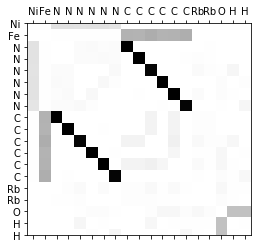

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.matshow(np.array(bo['mtx']),cmap=cm.binary)
x=plt.xticks(np.arange(len(bo['atomNames'])),bo['atomNames'])
y=plt.yticks(np.arange(len(bo['atomNames'])),bo['atomNames'])

As expected, `C-N` pairs have highest bond orders while `Fe-C` and `Ni-N` pairs are also bounded.

We now try to get some data from `overlap_population` analysis. The function `overlap_pop` should be used here. The detailed explanation of required arguments is shown in `qe2DDEC.py`. Let us first find overlap population of single atoms:

In [3]:
single = overlap_pop(iptpath,{1:['Rb','O', 'H']})

The result below show that the elctron orbitals on `O` primarily overlaps with `H`, indicating the negligible orbital overlapping between `Rb` and `O`.

In [4]:
single

{'Rb': [0.47442752299999996, 0.3182807722],
 'O': [1.4970663253],
 'H': [0.7600419889000001, 0.7627890968]}

Using 2-body inputs we find that `Rb-O` interaction is much more significant than `Rb-C` interactions

In [5]:
double = overlap_pop(iptpath,{2:[('Rb','O'),('Rb','C')]})
double

{('Rb', 'O'): [0.0906484105, 0.045064095],
 ('Rb', 'C'): [0.1766862616, 0.15024616079999997]}

To find the overlap population of a **triplet**, we need to specify the symbols of three atoms first by using chemical symbol list

In [6]:
print(bo['atomNames'])

['Ni', 'Fe', 'N', 'N', 'N', 'N', 'N', 'N', 'C', 'C', 'C', 'C', 'C', 'C', 'Rb', 'Rb', 'O', 'H', 'H']


Let us find the overlap population of the triplet made of `N`,`Ni`, and `N`

In [7]:
triplet = overlap_pop(iptpath,{3:[('N','Ni','N')]})

The result is a dictionary with keys being 3-tuples of atom indices

In [8]:
triplet

{(2, 3, 0): 0.5234995542,
 (2, 4, 0): 0.5133104514,
 (2, 5, 0): 0.5817953119,
 (2, 6, 0): 0.5209039392999999,
 (2, 7, 0): 0.553183649,
 (3, 4, 0): 0.5088379507,
 (3, 5, 0): 0.5696401956999999,
 (3, 6, 0): 0.5162010387,
 (3, 7, 0): 0.5477988655,
 (4, 5, 0): 0.5086229167999999,
 (4, 6, 0): 0.506824441,
 (4, 7, 0): 0.5564678844000001,
 (5, 6, 0): 0.5162548503000001,
 (5, 7, 0): 0.5246753221,
 (6, 7, 0): 0.49293072410000005}

If your triplet has `n` duplicated atom symbols `A` but your system only has `m`(`m<n`) `A`-atom, the function will generate the index tuple in an outer-product style, i.e. $m\bigoplus m$ for `n` times. For example, let us see what would happen in the following case where we only have one `O` in the system:

In [9]:
overlap_pop(iptpath,{3:[('Rb','O','O')]})

{(16, 16, 14): 0.0906484105, (16, 16, 15): 0.045064095}

In [10]:
overlap_pop(iptpath,{3:[('O','O','O')]})

{(16, 16, 16): 0}

Similar for **quadruplets**. For the quadruplet of `Ni`,`Rb`,`Rb`,`O`, we have

In [11]:
quadruplet = overlap_pop(iptpath,{4:[('Ni','Rb','Rb','O')]})
quadruplet

{(14, 15, 0, 16): 0.13891139289999999}

Also

In [12]:
overlap_pop(iptpath,{4:[('N','N','N','N')]})

{(2, 3, 4, 5): 0.1136258654,
 (2, 3, 4, 6): 0.0058306250999999995,
 (2, 3, 4, 7): 0.1830929467,
 (2, 3, 5, 6): 0.11370057030000001,
 (2, 3, 5, 7): 0.2497399203,
 (2, 3, 6, 7): 0.1119985578,
 (2, 4, 5, 6): 0.06254983730000001,
 (2, 4, 5, 7): 0.2166348039,
 (2, 4, 6, 7): 0.1305341226,
 (2, 5, 6, 7): 0.1458092605,
 (3, 4, 5, 6): 0.054967503499999994,
 (3, 4, 5, 7): 0.20837058719999998,
 (3, 4, 6, 7): 0.12972212149999998,
 (3, 5, 6, 7): 0.1373146439,
 (4, 5, 6, 7): 0.10502203260000001}

If we only have two `Rb` in the system but three `Rb` is used, we have:

In [13]:
overlap_pop(iptpath,{4:[('Rb','Rb','Rb','N')]})

{(14, 14, 14, 2): 0.0086539974,
 (14, 14, 14, 3): 0.0291615687,
 (14, 14, 14, 4): 0.0601445256,
 (14, 14, 14, 5): 0.0090143974,
 (14, 14, 14, 6): 0.0551586652,
 (14, 14, 14, 7): 0.008632179,
 (14, 14, 15, 2): 0.0325410779,
 (14, 14, 15, 3): 0.053215185500000005,
 (14, 14, 15, 4): 0.08511512140000001,
 (14, 14, 15, 5): 0.0170038135,
 (14, 14, 15, 6): 0.0675437202,
 (14, 14, 15, 7): 0.0143445728,
 (14, 15, 14, 2): 0.0330322448,
 (14, 15, 14, 3): 0.053706352400000004,
 (14, 15, 14, 4): 0.08560628830000001,
 (14, 15, 14, 5): 0.0174949804,
 (14, 15, 14, 6): 0.06803488710000001,
 (14, 15, 14, 7): 0.0148357397,
 (14, 15, 15, 2): 0.0325410779,
 (14, 15, 15, 3): 0.053215185500000005,
 (14, 15, 15, 4): 0.08511512140000001,
 (14, 15, 15, 5): 0.0170038135,
 (14, 15, 15, 6): 0.0675437202,
 (14, 15, 15, 7): 0.0143445728,
 (15, 14, 14, 2): 0.0325410779,
 (15, 14, 14, 3): 0.053215185500000005,
 (15, 14, 14, 4): 0.08511512140000001,
 (15, 14, 14, 5): 0.0170038135,
 (15, 14, 14, 6): 0.0675437202,
 (15, 

Similarly, if we have one `O` atom in the system but four is used in the tuple, we have:

In [14]:
overlap_pop(iptpath,{4:[('O','O','O','O')]})

{(16, 16, 16, 16): 0}

The single `O` atom in the system is well-screened by their neighbors so it doesn't see its images

In [15]:
overlap_pop(iptpath,{3:[('O','O','O')]})

{(16, 16, 16): 0}